In [258]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import RandomizedSearchCV
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from collections import defaultdict



In [259]:
data1 = pd.read_csv("train.csv")
data1.head(1)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23


In [260]:
data1.columns = ["ItemID","X2", "FatContent", "Visibility", "Type", "MRP", "OutletID",
 "EstablishmentYear", "Size", "Location_Type", "Outlet_Type","Y"]


In [261]:
data1.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [262]:
X = data1.drop("Y", axis=1)
Y = data1["Y"]

In [263]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [264]:
#get unique values of each categorical column
for col in categorical_features:
    print(f"Column: {col}")
    print(X[col].unique())

Column: ItemID
['FDA15' 'DRC01' 'FDN15' ... 'NCX17' 'FDH31' 'FDX13']
Column: FatContent
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Column: Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Column: OutletID
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Column: Size
['Medium' nan 'High' 'Small']
Column: Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Column: Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [265]:
#from ydata_profiling import ProfileReport

# Generate a profile report for data1
#profile = ProfileReport(data1, title="Data1 Profiling Report")

# To display the report in the Jupyter Notebook
#profile.to_notebook_iframe()

# Pipeline transformation

In [266]:
#visibility a lot of zeros

In [267]:
X.isnull().sum()

ItemID                  0
X2                   1006
FatContent              0
Visibility              0
Type                    0
MRP                     0
OutletID                0
EstablishmentYear       0
Size                 1711
Location_Type           0
Outlet_Type             0
dtype: int64

In [268]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [269]:
X.dtypes

ItemID                object
X2                   float64
FatContent            object
Visibility           float64
Type                  object
MRP                  float64
OutletID              object
EstablishmentYear      int64
Size                  object
Location_Type         object
Outlet_Type           object
dtype: object

In [270]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


this is just an initial pipeline for experementation, so KNN imputer would perform poorly as there are many unecessary features that will be removed later so we go by mode and change it to KNN at the end

In [271]:
X['Category'] = X['ItemID'].str[:2]

In [272]:

class TypeMeanPriceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, smoothing=1):
        self.smoothing = smoothing
        self.category_mean_price = None

    def fit(self, X, y=None):
        if y is None:
            raise ValueError("Target variable `y` cannot be None in the fit method.")
        data_ = X.copy()
        data_['Y'] = y
        # Calculate the mean price for each OutletID and Type
        mean_price = data_.groupby(['OutletID', 'Type'])['Y'].mean()
        count = data_.groupby(['OutletID', 'Type'])['Y'].count()
        global_mean = data_['Y'].mean()
        
        # Apply smoothing
        self.category_mean_price = ((mean_price * count) + (global_mean * self.smoothing)) / (count + self.smoothing)
        self.category_mean_price = self.category_mean_price.reset_index()
        self.category_mean_price.columns = ['OutletID', 'Type', 'TypeMeanPrice']
        return self

    def transform(self, X):
        X = X.copy()
        # Merge the mean price with the original dataframe
        X = pd.merge(X, self.category_mean_price, on=['OutletID', 'Type'], how='left')
        X['TypeMeanPrice'] = np.log1p(X['TypeMeanPrice'])
        return X[['TypeMeanPrice']]


In [273]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [274]:
class VisibilityZerosImputerZerosImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.item_Visibility_mean = defaultdict(lambda: None)  # Stores mean of Visibility per ItemID
        self.global_mean = None  # Fallback global mean for Visibility

    def fit(self, X, y=None):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'Visibility' not in X.columns:
            raise ValueError("Both 'ItemID' and 'Visibility' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Calculate mean Visibility for each ItemID
        item_Visibility_mean = X.groupby('ItemID')['Visibility'].mean()
        self.item_Visibility_mean.update(item_Visibility_mean.to_dict())

        # Calculate global mean for the Visibility column
        if X['Visibility'].notnull().any():
            self.global_mean = X['Visibility'].mean()
        else:
            raise ValueError("Visibility column contains only NaN values.")

        return self

    def transform(self, X):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'Visibility' not in X.columns:
            raise ValueError("Both 'ItemID' and 'Visibility' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Safely impute zero Visibilitys based on ItemID or global mean
        X['Visibility'] = X.apply(
            lambda row: self.item_Visibility_mean.get(row['ItemID'], self.global_mean)
            if row['Visibility'] == 0
            else row['Visibility'],
            axis=1
        )

        X['Visibility'] = X['Visibility'].replace(0, self.global_mean)
        X['Visibility'] = np.sqrt(X['Visibility'])

        return X[['Visibility']]


In [275]:
# Get the value counts of the 'ItemID' column
item_counts = X["ItemID"].value_counts()

# Filter the 'ItemID' values that appear more than once
items_with_multiple_entries = item_counts[item_counts > 1].index
print(items_with_multiple_entries.shape[0])
print(X['ItemID'].nunique())



1472
1553


so the imputer in effective in most cases

In [276]:
#['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
    #    'Size', 'Location_Type', 'Outlet_Type', 'Category', 'SKU', 'PastYears',
    #    'Outlet_TypeOrdinal']

In [277]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [278]:
print(X['FatContent'].value_counts())
print(X['Location_Type'].value_counts())
print(X['Outlet_Type'].value_counts())
print(X['Size'].value_counts())

FatContent
Low Fat    3595
Regular    2030
LF          220
reg          81
low fat      74
Name: count, dtype: int64
Location_Type
Tier 3    2358
Tier 2    1992
Tier 1    1650
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    3967
Grocery Store         737
Supermarket Type3     659
Supermarket Type2     637
Name: count, dtype: int64
Size
Medium    1935
Small     1682
High       672
Name: count, dtype: int64


In [279]:
X["FatContent"] = X["FatContent"].replace({"low fat": "LF", "Low Fat": "LF", "Regular": "REG", "reg": "REG"})
X.loc[X['Category'] == 'NC', 'FatContent'] = 'nofat'


In [280]:
X['FatContent'].value_counts()

FatContent
LF       2787
REG      2111
nofat    1102
Name: count, dtype: int64

In [281]:
class X2NaNsImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.item_X2_mode = defaultdict(lambda: None)  # Stores mode of X2 per ItemID
        self.global_mean = None  # Fallback global mean for X2

    def fit(self, X, y=None):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'X2' not in X.columns:
            raise ValueError("Both 'ItemID' and 'X2' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Calculate mode X2 for each ItemID
        item_X2_mode = X.groupby('ItemID')['X2'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        self.item_X2_mode.update(item_X2_mode.to_dict())

        # Calculate global mean for the X2 column
        if X['X2'].notnull().any():
            self.global_mean = X['X2'].mean()
        else:
            raise ValueError("X2 column contains only NaN values.")

        return self

    def transform(self, X):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'X2' not in X.columns:
            raise ValueError("Both 'ItemID' and 'X2' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Safely impute NaN X2s based on ItemID or global mean
        X['X2'] = X.apply(
            lambda row: self.item_X2_mode.get(row['ItemID'], self.global_mean)
            if pd.isnull(row['X2'])
            else row['X2'],
            axis=1
        )

        X['X2'] = X['X2'].fillna(self.global_mean)

        return X[['X2']]

In [282]:


class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
        self.scaler_price_per_unit_weight = StandardScaler()
        self.scaler_X2 = StandardScaler()
        self.scaler_pricing_strategy = StandardScaler()

    def fit(self, X, y=None):
        # Convert to DataFrame with updated column names
        X = pd.DataFrame(X, columns=self.column_names)
        # Create new features
        X['price_per_unit_weight'] = X['TypeMeanPrice_0'] / (X['X2'] + 0.0001)
        X['pricing_strategy'] = X['MRP'] - (X['TypeMeanPrice_0'] * (X['Outlet_TypeOrdinal'] + 1) * (X['Location_Type'] + 1))
        
        # Fit the scalers on the training data
        self.scaler_price_per_unit_weight.fit(X[['price_per_unit_weight']])
        self.scaler_X2.fit(X[['X2']])
        self.scaler_pricing_strategy.fit(X[['pricing_strategy']])
        
        return self

    def transform(self, X):
        # Convert to DataFrame with updated column names
        X = pd.DataFrame(X, columns=self.column_names)

        # Create new features
        X['BigMac_index2'] = (X['Visibility'] + 0.0001) * (X['Outlet_TypeOrdinal'] + 1) * (X['TypeMeanPrice_0'] + 3.24995) * (X['Location_Type'] + 1)
        X['price_per_unit_weight'] = X['TypeMeanPrice_0'] / (X['X2'] + 0.0001)
        X['BigMac_index2'] = np.sqrt(X['BigMac_index2'])
        X['pricing_strategy'] = X['MRP'] - (X['TypeMeanPrice_0'] * (X['Outlet_TypeOrdinal'] + 1) * (X['Location_Type'] + 1))
        X['RegionalPotential'] = X['Location_Type'] * (X['PastYearsCont'] + 1)

        # Standard scale the new features
        X['price_per_unit_weight'] = self.scaler_price_per_unit_weight.transform(X[['price_per_unit_weight']])
        X['X2'] = self.scaler_X2.transform(X[['X2']])
        X['pricing_strategy'] = self.scaler_pricing_strategy.transform(X[['pricing_strategy']])

        # Drop unwanted columns
        drop_columns = [
            "Category_DR", "Category_FD", "Outlet_Type_Supermarket Type2",'FatContent',
            "Outlet_Type_Supermarket Type1", "BigMac_index3",'Size',
            "Visibility", "BigMac_index", "Outlet_Type_Grocery Store", "Outlet_Type_Supermarket Type3"
        ]
        X.drop(columns=[col for col in drop_columns if col in X.columns], inplace=True)

        return X



In [283]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import pandas as pd

class KMeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters=5, random_state=42):
        self.num_clusters = num_clusters
        self.random_state = random_state
        

    def fit(self, X, y=None):
        #X = X.drop("price_per_unit_weight", axis=1)
        # Fit KMeans using the original features
        self.feature_names_in_ = X.columns  # Store original column names
        self.kmeans = KMeans(n_clusters=self.num_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        #X = X.drop("price_per_unit_weight", axis=1)
        # Ensure the input columns match those seen during fit
        if list(X.columns) != list(self.feature_names_in_):
            raise ValueError(
                "The feature names should match those that were passed during fit.\n"
                f"Feature names unseen at fit time: {set(X.columns) - set(self.feature_names_in_)}\n"
                f"Feature names seen at fit time but not in transform: {set(self.feature_names_in_) - set(X.columns)}"
            )
        
        # Compute cluster labels
        cluster_labels = self.kmeans.predict(X)

        # Compute distances to centroids
        centroid_distances = self.kmeans.transform(X)

        # Create a new DataFrame with cluster labels and centroid distances
        new_features = pd.DataFrame(
            centroid_distances, 
            columns=[f"Centroid_{i}" for i in range(centroid_distances.shape[1])],
            index=X.index
        )
        new_features['Cluster'] = cluster_labels

        # Concatenate the original DataFrame with the new features
        X_transformed = pd.concat([X.reset_index(drop=True), new_features.reset_index(drop=True)], axis=1)
        return X_transformed



In [284]:
X['Size'].fillna('Small', inplace=True)

C:\Users\shels\AppData\Local\Temp\ipykernel_33816\1989471734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Size'].fillna('Small', inplace=True)


In [285]:
X.isnull().sum()

ItemID                  0
X2                   1006
FatContent              0
Visibility              0
Type                    0
MRP                     0
OutletID                0
EstablishmentYear       0
Size                    0
Location_Type           0
Outlet_Type             0
Category                0
dtype: int64

In [286]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [287]:
X['Visibility'] = np.sqrt(X['Visibility'])

In [288]:
X['FatContent'].value_counts()

FatContent
LF       2787
REG      2111
nofat    1102
Name: count, dtype: int64

In [289]:
print(X['Location_Type'].value_counts())
print(X['Size'].value_counts())
print(X['Category'].value_counts())

Location_Type
Tier 3    2358
Tier 2    1992
Tier 1    1650
Name: count, dtype: int64
Size
Small     3393
Medium    1935
High       672
Name: count, dtype: int64
Category
FD    4335
NC    1102
DR     563
Name: count, dtype: int64


In [290]:
X['Size'].isnull().sum()

0

In [291]:
X.Size.value_counts()

Size
Small     3393
Medium    1935
High       672
Name: count, dtype: int64

In [292]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [293]:
X['MRP_cluster']=pd.cut(X['MRP'],bins=[25,69,137,203,270],labels=['very low','low','high','very high'],right=True)

In [294]:
X['OutletID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [295]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low


In [296]:
all_features = ['EstablishmentYear', 'MRP',"Outlet_Type",'MRP_cluster']
target_encoder_cols = ['Type']
numerical_cols = ['EstablishmentYear', 'MRP']
VisibilityZeros_cols = ['ItemID','Visibility']
X2_imputer_cols = ['X2','ItemID']
ordinal_cols = [ "Outlet_Type",'MRP_cluster']
TypeMeanPriceTransformer_col = ['OutletID' ,'Type']
one_hot_columns = ['Category','Size','Location_Type','OutletID','FatContent']  # only one-hot encoding
ordinal_categories = [  # FatContent 
    ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
    ['very low','low','high','very high'] 
    
   # Size
]

# Define numerical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
    #,("scaler", StandardScaler())
])

# size_imputer_pipeline = Pipeline([
#     ("custom_size_imputer", SizeImputer()),
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("ordinal", OrdinalEncoder(categories=[['Small', 'Medium', 'High']]))
# ])

type_mean_price_pipeline = Pipeline([
    ("type_mean_price_transformer", TypeMeanPriceTransformer(smoothing=0.5)),
    ("imputer", SimpleImputer(strategy="mean"))
])

# Define one-hot encoding pipeline
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

# Define one-hot encoding pipeline for onehot-transform columns
onehot_transform_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
# Define target encoding pipeline
target_encoding_pipeline = Pipeline([
    ("target_encoder", TargetEncoder(cols=target_encoder_cols , smoothing=0.5) )
])

# Combine all pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
   # ("type_mean_price", type_mean_price_pipeline, TypeMeanPriceTransformer_col),
    #("target_encoder", target_encoding_pipeline, target_encoder_cols),
    ("ordinal", ordinal_pipeline, ordinal_cols)
    #("onehot_", onehot_transform_pipeline, one_hot_columns)
    #("X2_imputer", X2NaNsImputer(), X2_imputer_cols)
   # ("VisibilityZeros", VisibilityZerosImputerZerosImputer(), VisibilityZeros_cols)
])

# Define the final pipeline
# Create the extended pipeline
final_pipeline = Pipeline([
    ("preprocessor", preprocessor)
    #("custom_features", CustomFeatureTransformer(column_names=all_features )),
    #("kmeans", KMeansTransformer(num_clusters=5, random_state=42))
])


    

# Fit and transform the data


# Get the feature names after transformation




In [297]:
X_trans = preprocessor.fit_transform(X, Y)
X_trans = pd.DataFrame(X_trans, columns=all_features)

In [298]:
X_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster
0,1999.0,249.8092,1.0,3.0
1,2009.0,48.2692,2.0,0.0
2,1999.0,141.6180,1.0,2.0
3,1998.0,182.0950,0.0,2.0
4,1987.0,53.8614,1.0,0.0


In [299]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low


In [300]:
X_trans.dtypes

EstablishmentYear    float64
MRP                  float64
Outlet_Type          float64
MRP_cluster          float64
dtype: object

In [301]:
categorical_columns = ['OutletID']
for col in categorical_columns:
    X_trans[col] = X[col].astype('category')


In [302]:
X_trans.EstablishmentYear = X_trans.EstablishmentYear.astype('category')
X_trans.MRP_cluster = X_trans.MRP_cluster.astype('category')

In [303]:
X_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID
0,1999.0,249.8092,1.0,3.0,OUT049
1,2009.0,48.2692,2.0,0.0,OUT018
2,1999.0,141.6180,1.0,2.0,OUT049
3,1998.0,182.0950,0.0,2.0,OUT010
4,1987.0,53.8614,1.0,0.0,OUT013


In [304]:
X_trans.dtypes

EstablishmentYear    category
MRP                   float64
Outlet_Type           float64
MRP_cluster          category
OutletID             category
dtype: object

In [305]:
X_trans.describe()

,MRP,Outlet_Type
count,6000.000000,6000.000000
mean,141.228200,1.203000
std,62.540569,0.791978
min,31.290000,0.000000
25%,94.037650,1.000000
50%,143.197000,1.000000
75%,186.522050,1.000000
max,266.888400,3.000000


In [306]:
X['Visibility'].isnull().sum()  

0

In [307]:
X_trans.columns

Index(['EstablishmentYear', 'MRP', 'Outlet_Type', 'MRP_cluster', 'OutletID'], dtype='object')

array([[<Axes: title={'center': 'MRP'}>,
        <Axes: title={'center': 'Outlet_Type'}>]], dtype=object)

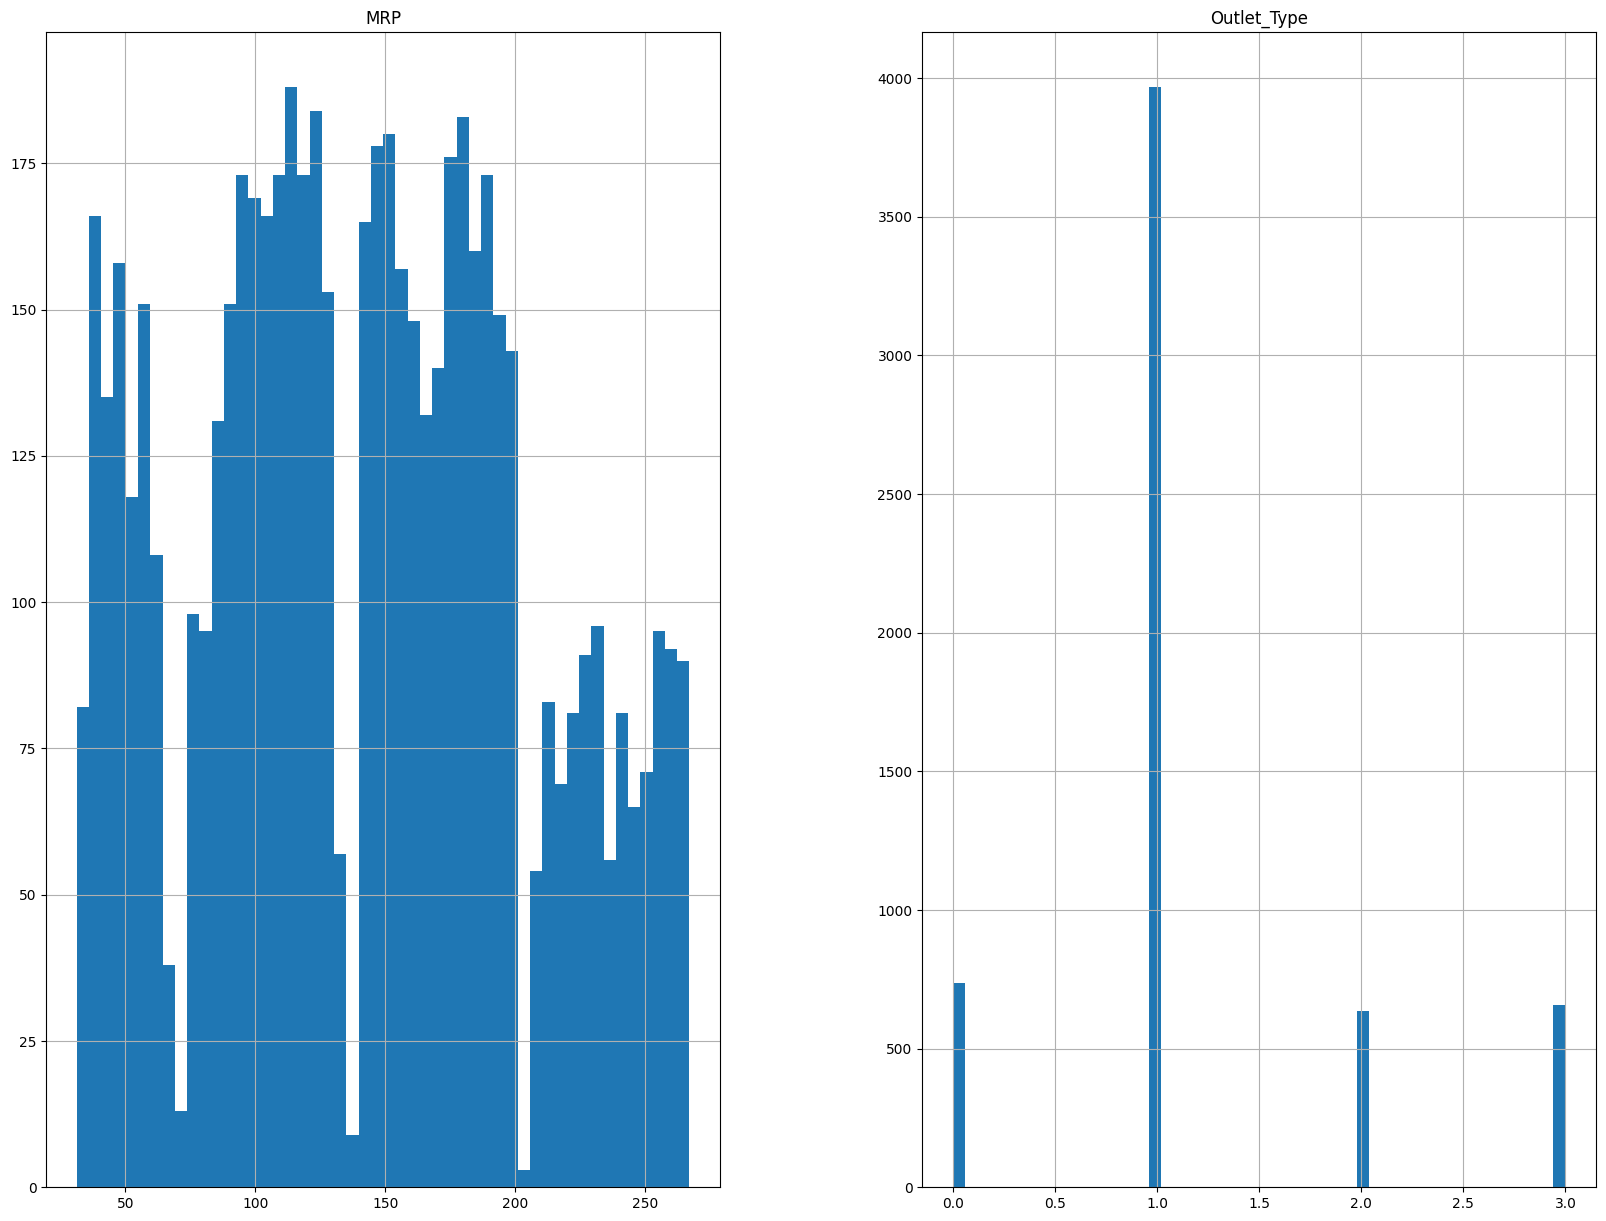

In [308]:
X_trans.hist(bins=50, figsize=(20,15))

In [309]:
import optuna
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# XGBoost Best MAE: 0.40492127871513367 {'n_estimators': 316, 'learning_rate': 0.03343742657654649, 'max_depth': 3, 'subsample': 0.8725045035358394, 'colsample_bytree': 0.6200837563354017, 'reg_alpha': 7.451401065371542, 'reg_lambda': 5.6700588848442495, 'min_child_weight': 5}
#XGBoost Best Parameters: {'n_estimators': 434, 'learning_rate': 0.1706857071717879, 'max_depth': 3, 'subsample': 0.9043683429222005, 'colsample_bytree': 0.4837899773905542, 'reg_alpha': 3.930334020908622, 'reg_lambda': 4.1181189812874415, 'min_child_weight': 8, 'gamma': 3.796556539609135, 'max_bin': 456}
#XGBoost Best MAE: 0.3999922735118866 -> 0.380
#XGBoost Best MAE: 0.3999125253868103 {'n_estimators': 645, 'learning_rate': 0.08246126945398424, 'max_depth': 3, 'subsample': 0.7081988059643293, 'colsample_bytree': 0.6330037289970052, 'reg_alpha': 0.8282709120520104, 'reg_lambda': 5.40495988414503, 'min_child_weight': 1, 'gamma': 4.529162516173125, 'max_bin': 216}
#XGBoost Best Parameters: {'n_estimators': 428, 'learning_rate': 0.013922532823198913, 'max_depth': 3, 'subsample': 0.9560319126819579, 'colsample_bytree': 0.9913119815669664, 'reg_alpha': 2.4636880126742784, 'reg_lambda': 3.197611647903612, 'min_child_weight': 3, 'gamma': 2.5352994647626064, 'max_bin': 365}
#XGBoost Best MAE: 0.40127532726287846 native handling -> 0.377
# XGBoost Best Parameters: {'n_estimators': 552, 'learning_rate': 0.03545956529477269, 'max_depth': 3, 'subsample': 0.49275963366371445, 'colsample_bytree': 0.49670484846435375, 'reg_alpha': 4.093522857285916, 'reg_lambda': 5.396847359885385, 'min_child_weight': 9, 'gamma': 3.584197310823081, 'max_bin': 497}
# XGBoost Best MAE: 0.39961741983413696 remove unimportant features -> 0.373

# def objective_xgb(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 800),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'subsample': trial.suggest_float('subsample', 0.4, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'max_bin': trial.suggest_int('max_bin', 128, 512),
#         'objective': 'reg:absoluteerror',  # alternative: 'reg:squarederror'
#         'eval_metric': 'mae',  # or 'gpu_hist' for GPU acceleration
#         'random_state': 42,
#         'enable_categorical': True  # Enable native categorical handling
#     }

#     model = XGBRegressor(**param)
#     pipeline = Pipeline([
#         ('final_transform', final_pipeline),
#         ('xgb', model)
#     ])

#     scores = cross_val_score(model, X_trans, Y, cv=5, scoring='neg_mean_absolute_error')
#     mae = -scores.mean()
#     return mae

# study_xgb = optuna.create_study(direction='minimize')
# study_xgb.optimize(objective_xgb, n_trials=70)

# print("XGBoost Best Parameters:", study_xgb.best_params)
# print("XGBoost Best MAE:", study_xgb.best_value)



In [310]:
# test_data = pd.read_csv("test.csv")
# test_data.columns = ["ItemID","X2", "FatContent", "Visibility", "Type", "MRP", "OutletID",
#  "EstablishmentYear", "Size", "Location_Type", "Outlet_Type"]
# test_data['Category'] = test_data['ItemID'].str[:2]
# test_data["FatContent"] = test_data["FatContent"].replace({"low fat": "LF", "Low Fat": "LF", "Regular": "REG", "reg": "REG"})
# test_data.loc[test_data['Category'] == 'NC', 'FatContent'] = 'nofat'
# test_data['Size'].fillna('Small', inplace=True)
# test_data['MRP_cluster']=pd.cut(test_data['MRP'],bins=[25,69,137,203,270],labels=['very low','low','high','very high'],right=True)
# test_data_trans = preprocessor.transform(test_data)
# test_data_trans = pd.DataFrame(test_data_trans, columns=all_features)
# test_data.head()

In [311]:
# test_data_trans.head()

In [312]:

# categorical_columns = ['OutletID']
# for col in categorical_columns:
#     test_data_trans[col] = test_data[col].astype('category')
# test_data_trans.EstablishmentYear = test_data_trans.EstablishmentYear.astype('category')
# test_data_trans.MRP_cluster = test_data_trans.MRP_cluster.astype('category')
# test_data_trans.head()


In [313]:
# Update the XGBRegressor model with the best parameters from the Optuna study
best_xgb_params = {
    'n_estimators': 552,
    'learning_rate': 0.03545956529477269,
    'max_depth': 3,
    'subsample': 0.49275963366371445,
    'colsample_bytree': 0.49670484846435375,
    'reg_alpha': 4.093522857285916,
    'reg_lambda': 5.396847359885385,
    'min_child_weight': 9,
    'gamma': 3.584197310823081,
    'max_bin': 497,
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'random_state': 42,
    'enable_categorical': True
}
# Create the XGBRegressor model with the best parameters
best_xgb_model = XGBRegressor(**best_xgb_params)

# Create the pipeline with the final preprocessor and the best XGBRegressor model
pipeline = Pipeline([
    ('final_transform', final_pipeline),
    ('xgb', best_xgb_model)
])

# Fit the pipeline to the training data
#best_xgb_model.fit(X_trans, Y)

# # Display the updated pipeline
# predictons = best_xgb_model.predict(test_data_trans)

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size=0.2, random_state=42)

In [315]:
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"Y_train type: {type(Y_train)}, shape: {Y_train.shape}")


X_train type: <class 'pandas.core.frame.DataFrame'>, shape: (4800, 5)
Y_train type: <class 'pandas.core.series.Series'>, shape: (4800,)


In [316]:
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_frame()
if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()
if isinstance(Y_test, pd.Series):
    Y_test = Y_test.to_frame()


In [317]:
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"Y_train type: {type(Y_train)}, shape: {Y_train.shape}")

X_train type: <class 'pandas.core.frame.DataFrame'>, shape: (4800, 5)
Y_train type: <class 'pandas.core.frame.DataFrame'>, shape: (4800, 1)


In [318]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    tick_labels_dict = {"tick_labels": X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
# Assuming `pipeline` is already fitted

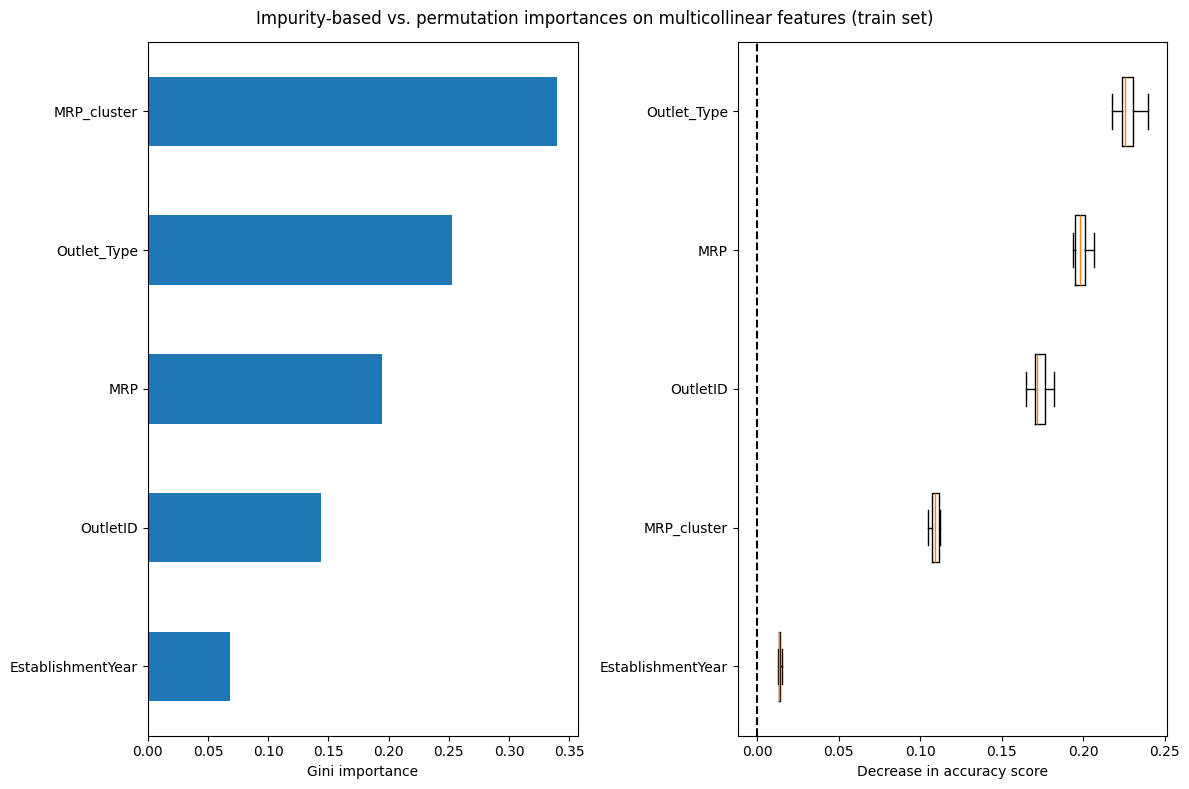

In [319]:
# Fit the pipeline
best_xgb_model.fit(X_train, Y_train)

# Calculate feature importances
mdi_importances = pd.Series(pipeline.named_steps['xgb'].feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(pipeline.named_steps['xgb'].feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance
plot_permutation_importance(pipeline.named_steps['xgb'], X_train, Y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (train set)")
fig.tight_layout()
plt.show()

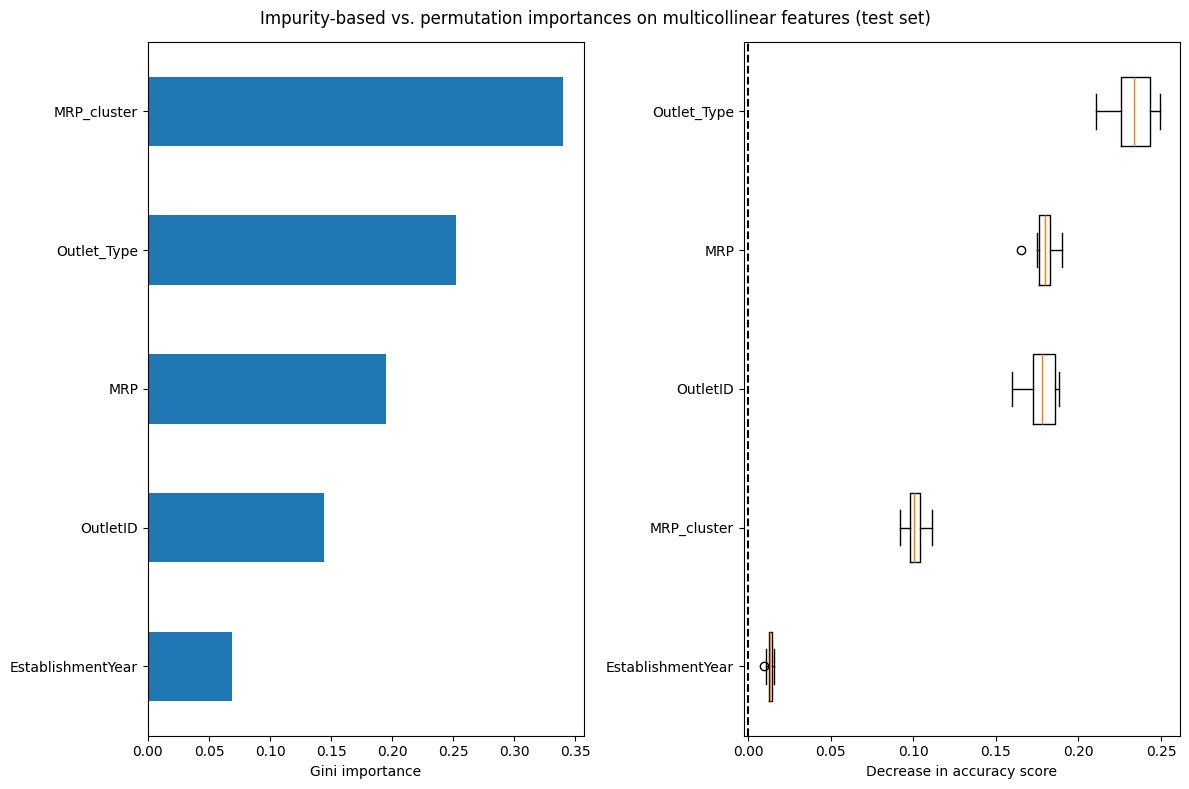

In [320]:
# Assuming X_transformed_test is already defined and transformed using the final pipeline
# Convert X_transformed_test to DataFrame
X_transformed_test_df = pd.DataFrame(X_test, columns=X_train.columns)

mdi_importances_test = pd.Series(pipeline.named_steps['xgb'].feature_importances_, index=X_train.columns)
tree_importance_sorted_idx_test = np.argsort(pipeline.named_steps['xgb'].feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance for test data
mdi_importances_test.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance for test data
plot_permutation_importance(pipeline.named_steps['xgb'], X_test, Y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (test set)")
fig.tight_layout()
plt.show()

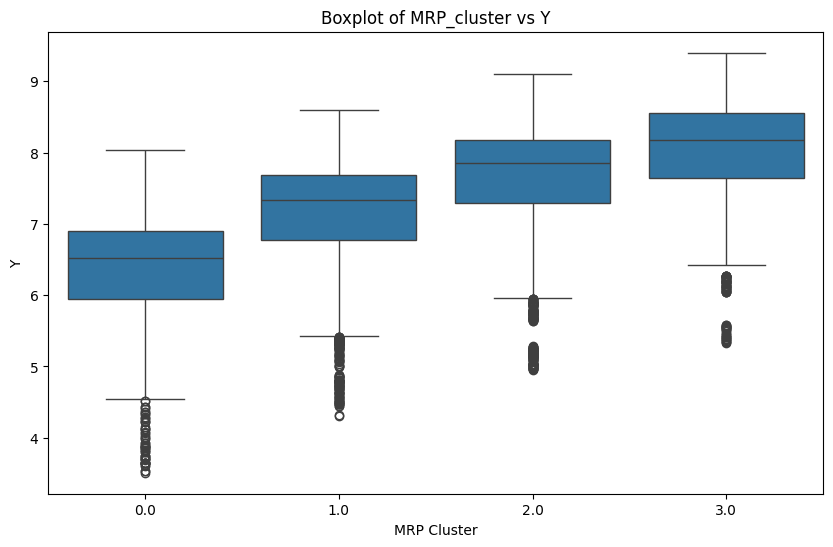

In [321]:

demo = pd.concat([X_trans, Y], axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='MRP_cluster', y='Y', data=demo)
plt.title('Boxplot of MRP_cluster vs Y')
plt.xlabel('MRP Cluster')
plt.ylabel('Y')
plt.show()

outliers seems off on the lower side

In [322]:
# Assuming demo is the combined DataFrame with X_trans and Y
outliers = pd.DataFrame()

for cluster in demo['MRP_cluster'].unique():
    cluster_data = demo[demo['MRP_cluster'] == cluster]
    Q1 = cluster_data['Y'].quantile(0.25)
    Q3 = cluster_data['Y'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cluster_outliers = cluster_data[(cluster_data['Y'] < lower_bound) | (cluster_data['Y'] > upper_bound)]
    outliers = pd.concat([outliers, cluster_outliers])

outliers = outliers.drop_duplicates()
outliers.head(20)


,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID,Y
217,1998.0,260.0936,0.0,3.0,OUT010,5.56
225,1985.0,211.9560,0.0,3.0,OUT019,5.36
278,1998.0,250.4408,0.0,3.0,OUT010,6.22
317,1998.0,228.2720,0.0,3.0,OUT010,6.12
387,1998.0,235.1248,0.0,3.0,OUT010,6.16
483,1998.0,258.3278,0.0,3.0,OUT010,6.26
502,1998.0,263.4568,0.0,3.0,OUT010,6.27
895,1997.0,263.0568,1.0,3.0,OUT046,6.27
924,1985.0,250.4724,0.0,3.0,OUT019,5.53
1490,1985.0,242.4170,0.0,3.0,OUT019,6.19


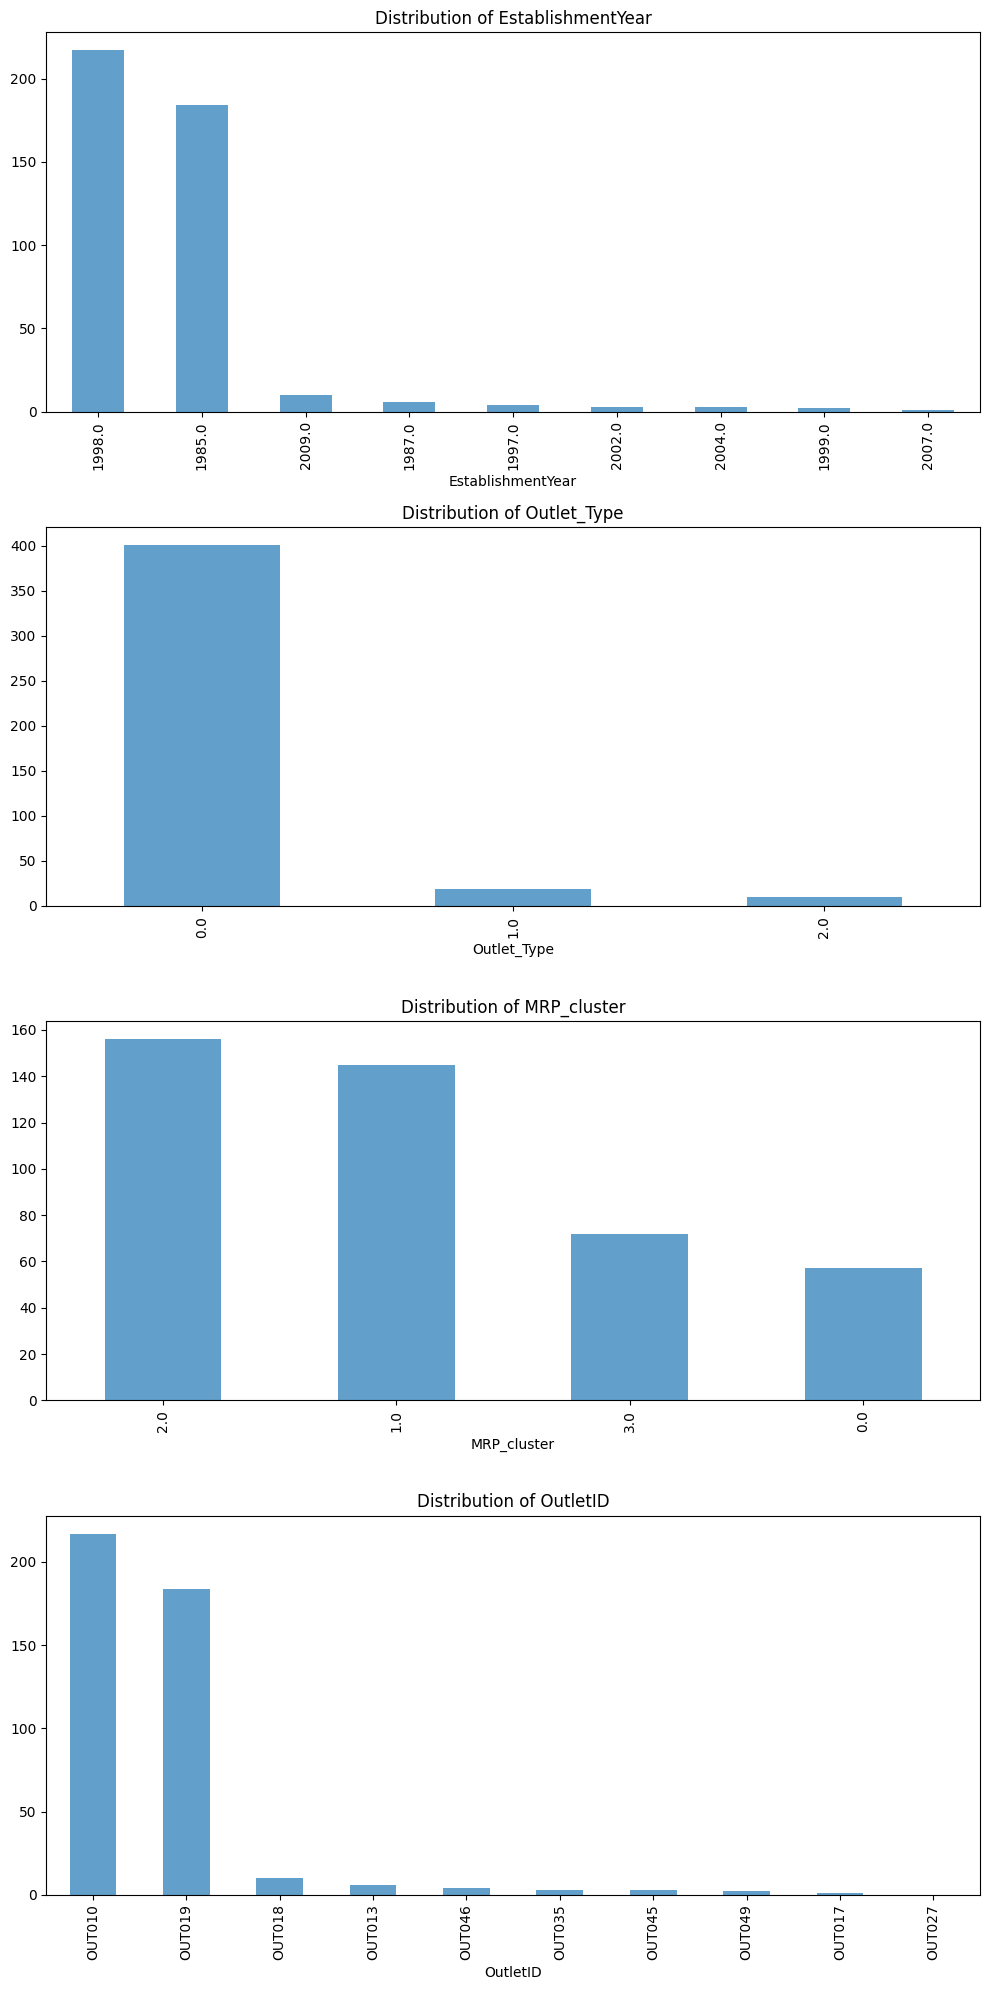

In [323]:
# Plot histogram distribution for specified features in the outliers DataFrame
outliers.EstablishmentYear = outliers.EstablishmentYear.astype('category')
outliers.MRP_cluster = outliers.MRP_cluster.astype('category')
outliers.OutletID = outliers.OutletID.astype('category')
features_to_plot = ['EstablishmentYear', 'Outlet_Type', 'MRP_cluster', 'OutletID']

# Convert categorical features to numeric codes for histogram plotting
# Plot all features in a single plot
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 20))
for i, feature in enumerate(features_to_plot):
    outliers[feature].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [324]:
# Predict the values for the test set
predictions = best_xgb_model.predict(X_test)
# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions,index=X_test.index, columns=['Y'])

# Calculate the residuals
residuals = Y_test - predictions_df
print(residuals.shape)
residuals.head()

(1200, 1)


,Y
1782,-0.182686
3917,0.106312
221,0.052911
2135,-0.321517
5224,0.392726


In [325]:
predictions_df.head()

,Y
1782,7.532686
3917,8.333688
221,7.207089
2135,6.221517
5224,5.917274


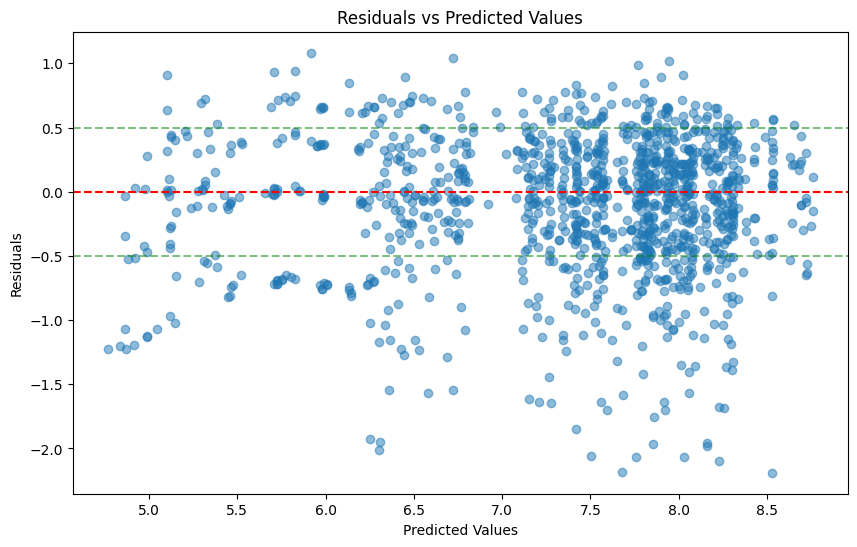

In [326]:

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--', alpha=0.5)
plt.axhline(y=-0.5, color='g', linestyle='--', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [327]:
high_residuals_indices = residuals[residuals['Y'].abs() > 0.5].index
print(len(high_residuals_indices))

369


In [328]:
high_residual = X.loc[high_residuals_indices]
high_residual['residuals'] = residuals
high_residual.head(20)

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster,residuals
879,DRM48,15.200,LF,0.336342,Soft Drinks,38.6848,OUT045,2002,Small,Tier 2,Supermarket Type1,DR,very low,0.731515
156,FDB36,5.465,REG,0.000000,Baking Goods,132.5626,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,low,-1.850458
1657,FDL52,6.635,REG,0.215123,Frozen Foods,36.7506,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,very low,-1.923674
393,FDU02,NaN,LF,0.423656,Dairy,228.9352,OUT019,1985,Small,Tier 1,Grocery Store,FD,very high,0.613168
5470,FDC40,16.000,REG,0.255595,Dairy,78.4986,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,low,0.503659
4102,FDT55,13.600,REG,0.209150,Fruits and Vegetables,157.7946,OUT045,2002,Small,Tier 2,Supermarket Type1,FD,high,-0.776901
5545,DRH01,17.500,LF,0.313213,Soft Drinks,172.9738,OUT045,2002,Small,Tier 2,Supermarket Type1,DR,high,0.503550
2858,FDV07,9.500,LF,0.177007,Fruits and Vegetables,111.1228,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,low,-0.912189
996,NCL30,18.100,nofat,0.221204,Household,127.3336,OUT035,2004,Small,Tier 2,Supermarket Type1,NC,low,-0.519552
3264,FDI52,18.700,LF,0.323868,Frozen Foods,121.4072,OUT045,2002,Small,Tier 2,Supermarket Type1,FD,low,0.537314


In [329]:
high_residual.MRP_cluster =  high_residual.MRP_cluster.astype('str')        

In [330]:
# Merge the outliers and high_residual DataFrames to find common rows
common_outliers = outliers[outliers.index.isin(high_residual.index)]

# Calculate the percentage of outliers that exist in high_residual
percentage_common = (len(common_outliers) / len(outliers)) * 100

print(f"Percentage of outliers that exist in high_residual: {percentage_common:.2f}%")

Percentage of outliers that exist in high_residual: 12.56%


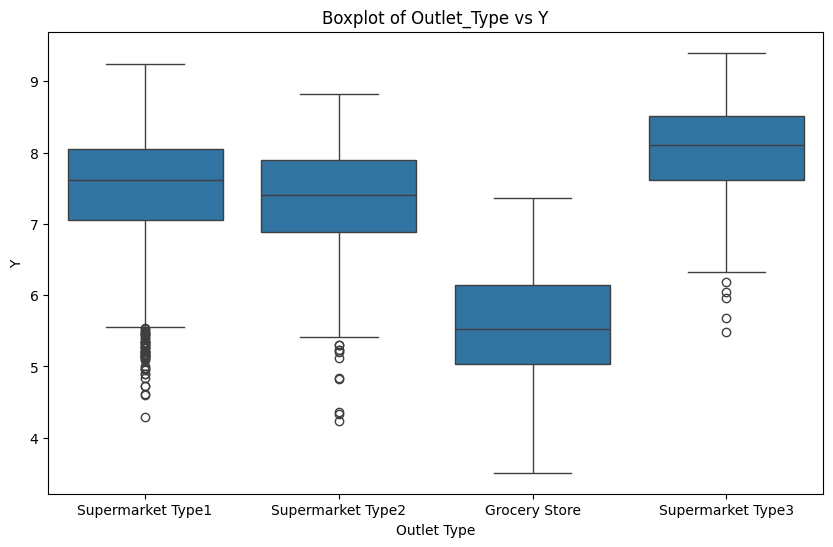

In [331]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Y', data=pd.concat([X, Y], axis=1))
plt.title('Boxplot of Outlet_Type vs Y')
plt.xlabel('Outlet Type')
plt.ylabel('Y')
plt.show()

In [332]:
# Combine X and Y into a single DataFrame
combined_df = pd.concat([X, Y], axis=1)
# Initialize an empty DataFrame to store the outliers
outliers_df = pd.DataFrame()
# Loop through each Outlet_Type to calculate the IQR and identify outliers
for outlet_type in combined_df['Outlet_Type'].unique():
    # Filter the data for the current Outlet_Type
    outlet_data = combined_df[combined_df['Outlet_Type'] == outlet_type]
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = outlet_data['Y'].quantile(0.25)
    Q3 = outlet_data['Y'].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outlet_outliers = outlet_data[(outlet_data['Y'] < lower_bound) | (outlet_data['Y'] > upper_bound)]
    
    # Append the outliers to the outliers_df DataFrame
    outliers_df = pd.concat([outliers_df, outlet_outliers])

# Drop duplicates if any
outliers_df = outliers_df.drop_duplicates()

# Display the outliers
outliers_df.shape

(66, 14)

In [333]:
high_residual.dtypes

ItemID                object
X2                   float64
FatContent            object
Visibility           float64
Type                  object
MRP                  float64
OutletID              object
EstablishmentYear      int64
Size                  object
Location_Type         object
Outlet_Type           object
Category              object
MRP_cluster           object
residuals            float64
dtype: object

In [334]:
X.MRP_cluster = X.MRP_cluster.astype('str')
X.EstablismentYear = X.EstablishmentYear.astype('str')        

C:\Users\shels\AppData\Local\Temp\ipykernel_33816\1773037432.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.EstablismentYear = X.EstablishmentYear.astype('str')


In [335]:
X.dtypes

ItemID                object
X2                   float64
FatContent            object
Visibility           float64
Type                  object
MRP                  float64
OutletID              object
EstablishmentYear      int64
Size                  object
Location_Type         object
Outlet_Type           object
Category              object
MRP_cluster           object
dtype: object

In [336]:

# Define the categorical columns
# Select categorical columns, excluding 'ItemID'
categorical_columns = X.select_dtypes(include='object').columns
categorical_columns = categorical_columns.drop('ItemID')

# Create a dictionary to store the results for percentages
category_percentages = {}

# Total counts of each category in the entire dataset (for reference later)
total_counts = {}

# Loop through each categorical column
for col in categorical_columns:
    # Count occurrences of each category in the full dataset
    total_counts[col] = X[col].value_counts()
    
    # Count occurrences of each category in the high_residual dataframe
    high_residual_counts = high_residual[col].value_counts()
    
    # Calculate the percentage of occurrences in high_residual against the total count in X
    percentages = (high_residual_counts / total_counts[col]) 
    
    # Fill NaN (for categories not in high_residual) with 0%
    percentages = percentages.fillna(0)
    
    # Store the result in the dictionary
    category_percentages[col] = percentages

# Convert the dictionary to a single DataFrame for better readability
percentages_df = pd.DataFrame(category_percentages)

# Replace NaN values with 0 (in case some categories are missing across columns)
percentages_df.fillna(0, inplace=True)

# Add a 'Total' column that combines all percentages across all categorical columns
percentages_df['Total'] = percentages_df.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
percentages_df.sort_values(by='Total', ascending=False, inplace=True)

# Add a column for the total value count of each index value across all columns
percentages_df['Value Count'] = percentages_df.index.map(
    lambda x: sum(total_counts[col].get(x, 0) for col in categorical_columns)
)
percentages_df = percentages_df[['Total','Value Count']]
percentages_df['ValueCountPercentage'] = (percentages_df['Value Count'] / 6000) 
percentages_df['rare_outlier_index'] = percentages_df['Total'] * percentages_df['ValueCountPercentage'] * 100
percentages_df = percentages_df[['Total','ValueCountPercentage','rare_outlier_index']]
percentages_df.sort_values(by='rare_outlier_index', ascending=False, inplace=True)

# Output the top 50 rows for analysis
percentages_df.head(50)


,Total,ValueCountPercentage,rare_outlier_index
FD,0.060669,0.722500,4.383333
Supermarket Type1,0.057222,0.661167,3.783333
Small,0.066608,0.565500,3.766667
LF,0.065303,0.464500,3.033333
Tier 3,0.065734,0.393000,2.583333
high,0.062560,0.349000,2.183333
REG,0.058740,0.351833,2.066667
Tier 2,0.058233,0.332000,1.933333
low,0.055613,0.320667,1.783333
Medium,0.052196,0.322500,1.683333


In [337]:
percentages_df.to_csv('percentages_df.csv', index=True)

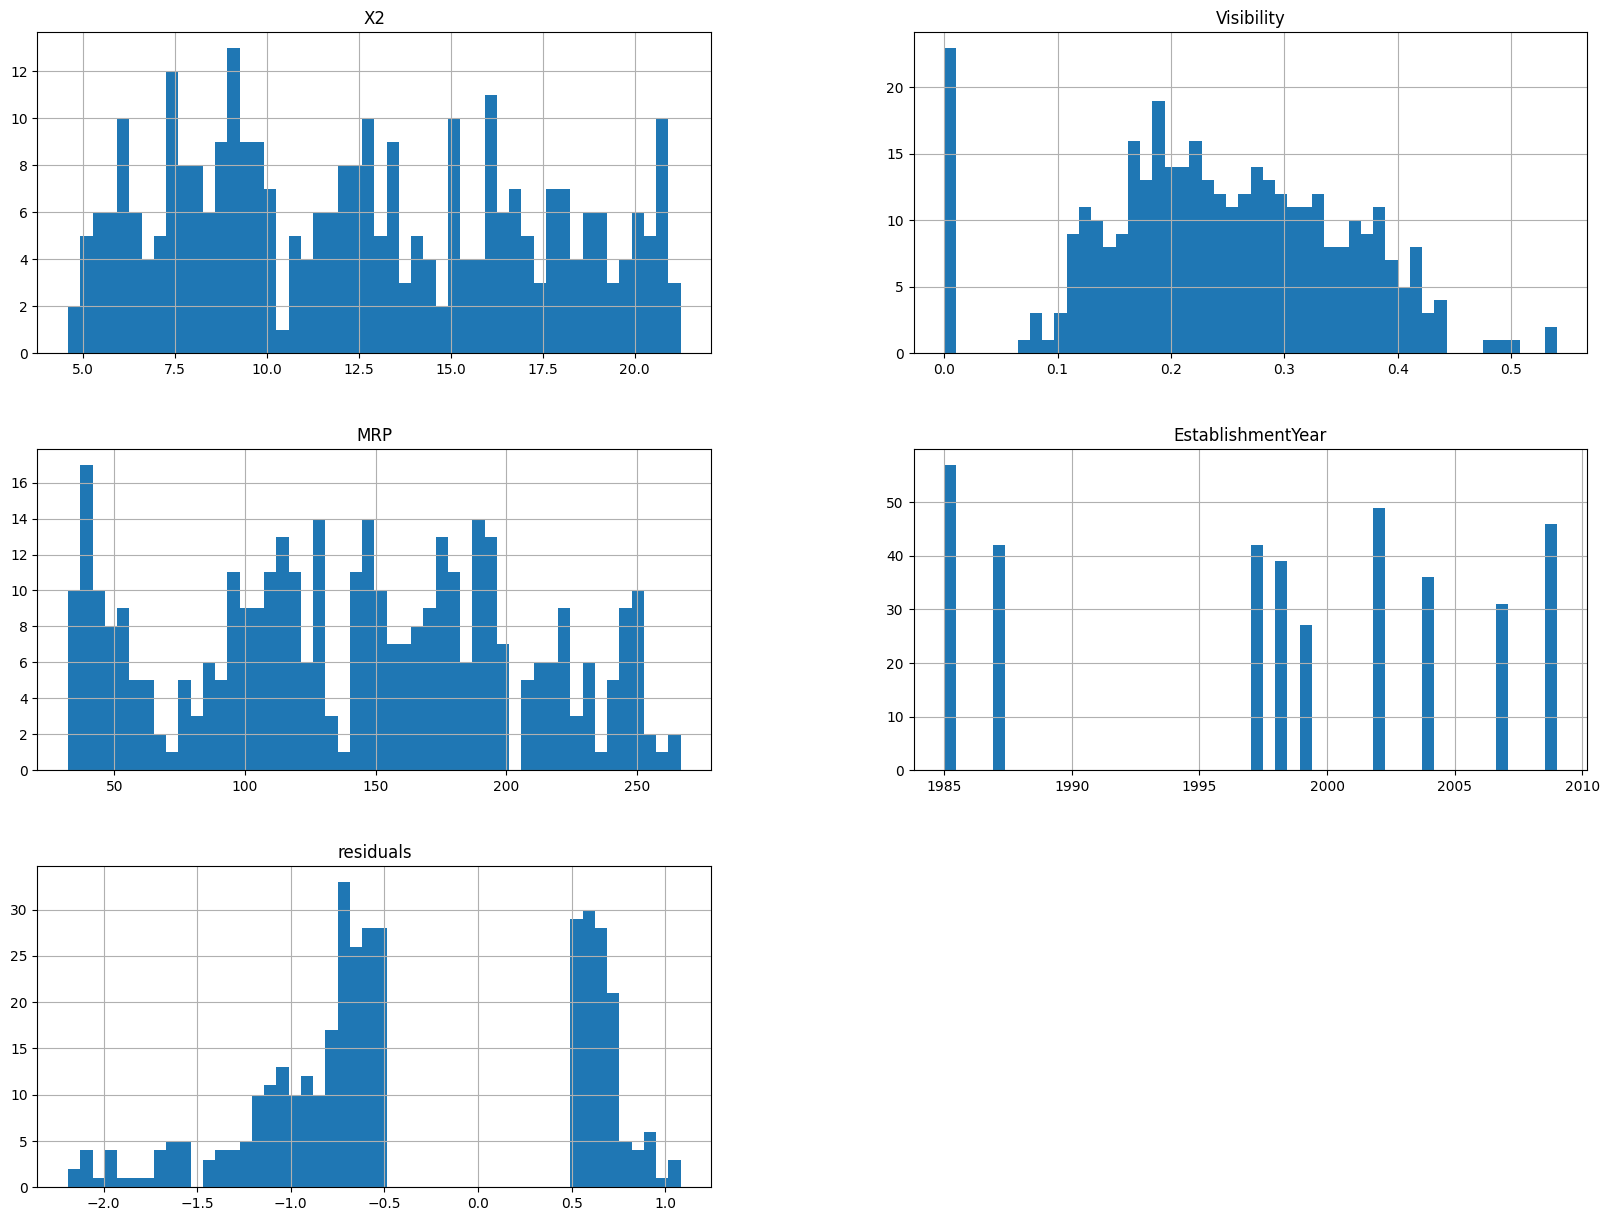

In [338]:
# Plot histograms for all numerical columns in the high_residual DataFrame
high_residual.hist(bins=50, figsize=(20, 15))
plt.show()

C:\Users\shels\AppData\Local\Temp\ipykernel_33816\2832971265.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=high_residual, x=col, ax=ax[r][c], palette="viridis", order=sorted_values, width=0.6)
C:\Users\shels\AppData\Local\Temp\ipykernel_33816\2832971265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\shels\AppData\Local\Temp\ipykernel_33816\2832971265.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=high_residual, x=col, ax=ax[r][c], palette="viridis", order=sorted_values, width=0.6)
C

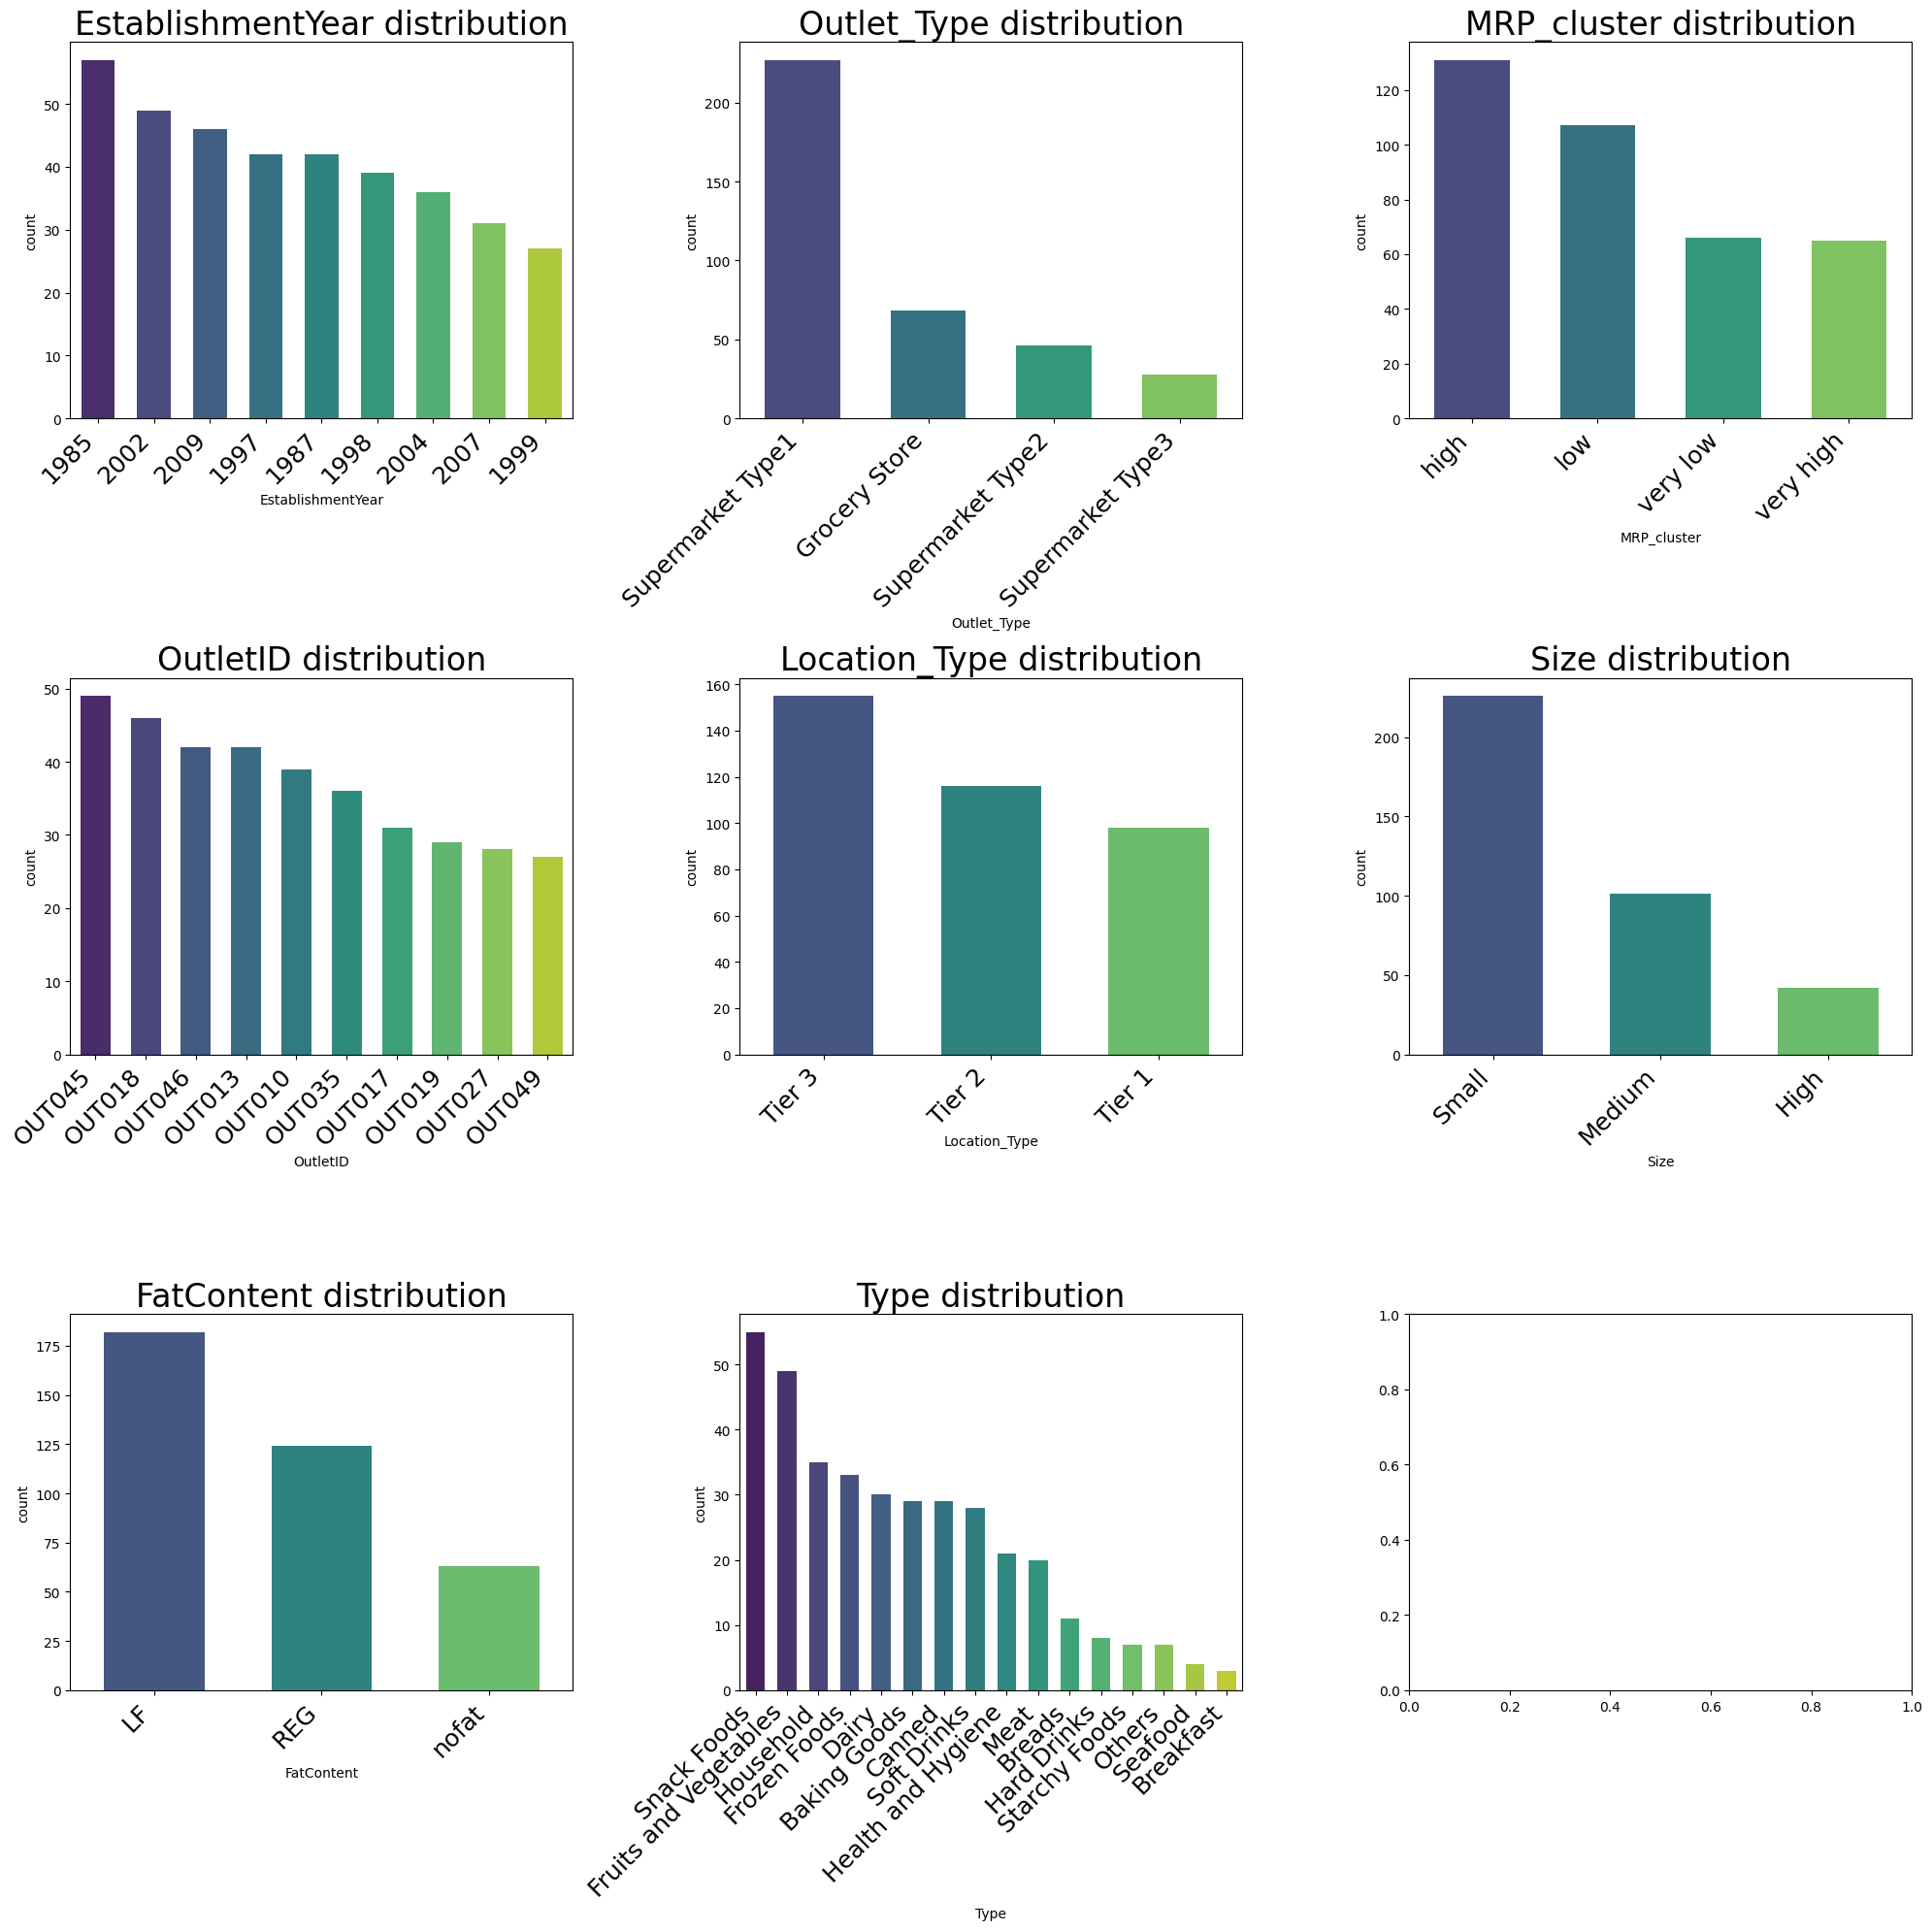

In [339]:

# List of features to plot
features_to_plot = ['EstablishmentYear', 'Outlet_Type', 'MRP_cluster', 'OutletID', 'Location_Type', 'Size', 'FatContent', 'Type']

# Create barplots for each feature
num_cols = 3
fig, ax = plt.subplots(len(features_to_plot) // num_cols + 1, num_cols, figsize=(20, 20))

for index, col in enumerate(features_to_plot):
    r = index // num_cols
    c = index % num_cols
    sorted_values = high_residual[col].value_counts().index
    g = sns.countplot(data=high_residual, x=col, ax=ax[r][c], palette="viridis", order=sorted_values, width=0.6)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()

plt.show()

In [340]:
filtered_df = high_residual[high_residual['Type'].isin(['Snack Foods', 'Frozen Foods', 'Fruits and Vegetables', 'Canned'])]
filtered_df.head(20)

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster,residuals
1657,FDL52,6.635,REG,0.215123,Frozen Foods,36.7506,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,very low,-1.923674
4102,FDT55,13.600,REG,0.209150,Fruits and Vegetables,157.7946,OUT045,2002,Small,Tier 2,Supermarket Type1,FD,high,-0.776901
2858,FDV07,9.500,LF,0.177007,Fruits and Vegetables,111.1228,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,low,-0.912189
3264,FDI52,18.700,LF,0.323868,Frozen Foods,121.4072,OUT045,2002,Small,Tier 2,Supermarket Type1,FD,low,0.537314
4543,FDW56,7.680,LF,0.266478,Fruits and Vegetables,190.9162,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high,0.527882
1580,FDI16,14.000,REG,0.369227,Frozen Foods,54.8640,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,very low,-0.817622
625,FDB21,7.475,LF,0.385347,Fruits and Vegetables,240.6854,OUT035,2004,Small,Tier 2,Supermarket Type1,FD,very high,-0.869685
3488,FDT34,9.300,LF,0.540210,Snack Foods,107.1964,OUT010,1998,Small,Tier 3,Grocery Store,FD,low,0.722190
3018,FDV01,NaN,REG,0.385665,Canned,155.1314,OUT019,1985,Small,Tier 1,Grocery Store,FD,high,-0.686155
1194,FDG46,NaN,REG,0.180970,Snack Foods,112.1518,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD,low,0.649583


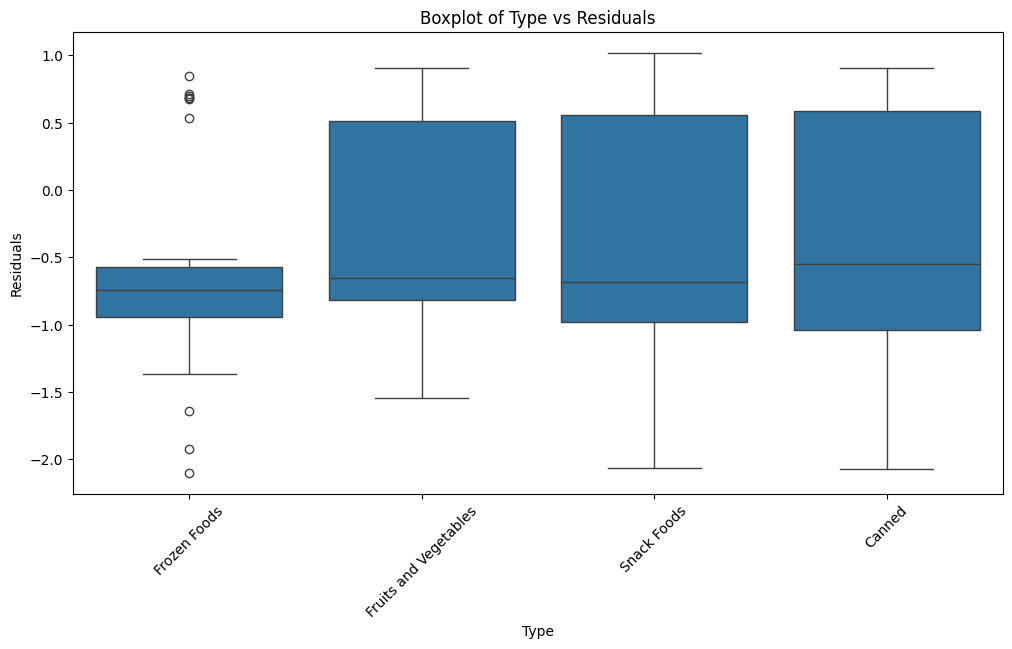

In [341]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='residuals', data=filtered_df)
plt.title('Boxplot of Type vs Residuals')
plt.xlabel('Type')
plt.ylabel('Residuals')
plt.xticks(rotation=45)
plt.show()

In [342]:
# Calculate the number of common indices
common_indices = outliers.index.intersection(high_residuals_indices)

# Calculate the percentage
percentage = (len(common_indices) / len(outliers.index)) * 100

print(f"Percentage of outliers that exist in high_residuals_indices: {percentage:.2f}%")

Percentage of outliers that exist in high_residuals_indices: 12.56%


# Residual Model

Insights About Model Performance
Overall Bias:

The residuals are centered around 0, meaning the model generally produces unbiased predictions. There is no clear indication of systematic over- or under-prediction across the full range of predicted sales prices.
This is a positive indicator of the model's calibration.
Heteroscedasticity:

The spread of residuals appears to increase for lower and higher predicted sales prices (e.g., below 6 and above 8). This suggests heteroscedasticity, where the model's prediction error varies with the magnitude of the predicted sales price.
For low-price products, the model shows higher residual variability, indicating the predictions for these products are less accurate.
Similarly, high-price products (above ~8) also exhibit larger prediction errors.
Clustering of Predictions:

The residuals show clustering at certain predicted values (e.g., around 6.5, 7.5, and 8). This could imply:
The model struggles with certain segments or categories of products.
The data might have underlying groups or subcategories (e.g., product types or brands) that the model isn’t fully capturing.
Outliers:

There are a few outliers with large residuals (e.g., <-1.5 or >1.0). These points correspond to extreme cases where the model predictions deviate significantly from the actual sales price. These outliers could result from:
Noise in the data (e.g., data entry errors or rare products).
Insufficient representation of these cases in the training data.
Prediction Accuracy Across Ranges:

The residuals for mid-range predicted prices (6.5–7.5) are relatively well-behaved, with smaller spreads. This suggests that the model performs better for mid-priced products compared to low- or high-priced ones.

In [343]:
X_residual = X.copy()
ordinal_encoder = OrdinalEncoder(categories=[['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']])
X_residual['Outlet_Type'] = ordinal_encoder.fit_transform(X_residual[['Outlet_Type']])

for col in X_residual.select_dtypes(include='object').columns:
    X_residual[col] = X_residual[col].astype('category')

# Verify the changes
print(X_residual.dtypes)
#X_residual.drop(columns=['Size','EstablishmentYear','Category','Location_Type','FatContent','MRP'], inplace=True)

ItemID               category
X2                    float64
FatContent           category
Visibility            float64
Type                 category
MRP                   float64
OutletID             category
EstablishmentYear       int64
Size                 category
Location_Type        category
Outlet_Type           float64
Category             category
MRP_cluster          category
dtype: object


In [344]:

# Split the data into training and testing sets
X_residual_train, X_residual_test = train_test_split(X_residual, test_size=0.2, random_state=42)
X2_imputer = X2NaNsImputer()
X_residual_train['X2'] = X2_imputer.fit_transform(X_residual_train[['ItemID', 'X2']]).values
X_residual_test['X2'] = X2_imputer.transform(X_residual_test[['ItemID', 'X2']]).values
X_residual_train.drop('ItemID', axis=1, inplace=True)
X_residual_test.drop('ItemID', axis=1, inplace=True)
X_residual.drop('ItemID', axis=1, inplace=True)


C:\Users\shels\AppData\Local\Temp\ipykernel_33816\3805476222.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_X2_mode = X.groupby('ItemID')['X2'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


In [345]:
X_residual_train.dtypes

X2                    float64
FatContent           category
Visibility            float64
Type                 category
MRP                   float64
OutletID             category
EstablishmentYear       int64
Size                 category
Location_Type        category
Outlet_Type           float64
Category             category
MRP_cluster          category
dtype: object

In [346]:
from sklearn.metrics import mean_absolute_error

# Predict the values for the training set
train_predictions = best_xgb_model.predict(X_train)
test_predictions = best_xgb_model.predict(X_test)
# Calculate the MAE for the training set
mae_train = mean_absolute_error(Y_train, train_predictions)
print(f"Mean Absolute Error (MAE) on training set: {mae_train:.2f}")
mae_test = mean_absolute_error(Y_test, test_predictions)
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.2f}")

# Get all the decimal values
decimal_values = [value for value in [mae_train, mae_test] if isinstance(value, float)]
print("Decimal values:", decimal_values)

Mean Absolute Error (MAE) on training set: 0.39
Mean Absolute Error (MAE) on test set: 0.41
Decimal values: [0.39159119719266894, 0.4112734010696411]


In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import optuna
# Step 1: Train primary model
best_xgb_model.fit(X_train, Y_train)

# Step 2: Compute residuals
primary_predictions = best_xgb_model.predict(X_trans)
primary_predictions_df = pd.DataFrame(primary_predictions, index=X_trans.index, columns=['Y'])
primary_predictions_train, primary_predictions_test = train_test_split(primary_predictions, test_size=0.2, random_state=42)
primary_predictions_train_df = pd.DataFrame(primary_predictions_train, index=Y_train.index, columns=['Y'])
primary_predictions_test_df = pd.DataFrame(primary_predictions_test, index= Y_test.index, columns=['Y'])


In [348]:
print(f"Primary predictions train shape: {primary_predictions_train_df.shape}")
print(f"Primary predictions test shape: {primary_predictions_test_df.shape}")

Primary predictions train shape: (4800, 1)
Primary predictions test shape: (1200, 1)


In [349]:
primary_predictions_test_df.head()

,Y
1782,7.532686
3917,8.333688
221,7.207089
2135,6.221517
5224,5.917274


In [350]:
Y_test.head()

,Y
1782,7.35
3917,8.44
221,7.26
2135,5.90
5224,6.31


In [351]:
primary_predictions_df.head()

,Y
0,8.277820
1,6.426707
2,7.769735
3,5.945295
4,6.688479


In [352]:
Y.head()

0    8.23
1    6.09
2    7.65
3    6.60
4    6.90
Name: Y, dtype: float64

In [353]:
Y_df = pd.DataFrame(Y, columns=['Y'])

In [354]:

residuals = Y_df - primary_predictions_df
residuals_train = Y_train - primary_predictions_train_df
residuals_test = Y_test - primary_predictions_test_df


In [355]:
residuals_train.head()

,Y
3897,-0.568219
5628,0.093903
1756,0.017021
2346,-0.124917
2996,0.245800


In [356]:
# Check if indices in Y_test are the same as in primary_predictions_test_df
residuals_test.head()

,Y
1782,-0.182686
3917,0.106312
221,0.052911
2135,-0.321517
5224,0.392726


In [357]:
primary_predictions_test_df.isnull().sum()

Y    0
dtype: int64

In [358]:
X_residual_test.isnull().sum()

X2                   0
FatContent           0
Visibility           0
Type                 0
MRP                  0
OutletID             0
EstablishmentYear    0
Size                 0
Location_Type        0
Outlet_Type          0
Category             0
MRP_cluster          0
dtype: int64

In [359]:
X_residual_train.isnull().sum()

X2                   0
FatContent           0
Visibility           0
Type                 0
MRP                  0
OutletID             0
EstablishmentYear    0
Size                 0
Location_Type        0
Outlet_Type          0
Category             0
MRP_cluster          0
dtype: int64

In [360]:
residuals_train.isnull().sum()

Y    0
dtype: int64

In [361]:
residuals_test.isnull().sum()

Y    0
dtype: int64

In [362]:
X_residual.head()

,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster
0,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,1.0,FD,very high
1,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,2.0,DR,very low
2,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,1.0,FD,high
3,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,0.0,FD,high
4,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,1.0,NC,very low


In [363]:
residuals.head()

,Y
0,-0.047820
1,-0.336707
2,-0.119735
3,0.654705
4,0.211521


In [364]:

residual_model = XGBRegressor(
    n_estimators=55,
    learning_rate=0.001030814950235995,
    max_depth=5,
    subsample=0.4789958199724604,
    colsample_bytree=0.769885413909267,
    reg_alpha=9.995928562906279,
    reg_lambda=2.764171808967794,
    min_child_weight=6,
    gamma=1.919110955963624,
    max_bin=281,
    enable_categorical=True,
    random_state=42,
    objective='reg:absoluteerror',
    eval_metric='mae'
)


In [365]:
residual_model.fit(X_residual, residuals)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.769885413909267, device=None,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric='mae', feature_types=None, gamma=1.919110955963624,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001030814950235995,
             max_bin=281, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=55, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [366]:
print(residual_model.feature_importances_)

[0.08210415 0.07508386 0.08596906 0.14232233 0.07701096 0.10076821
 0.08067713 0.0616436  0.08314165 0.06799617 0.07522918 0.06805371]


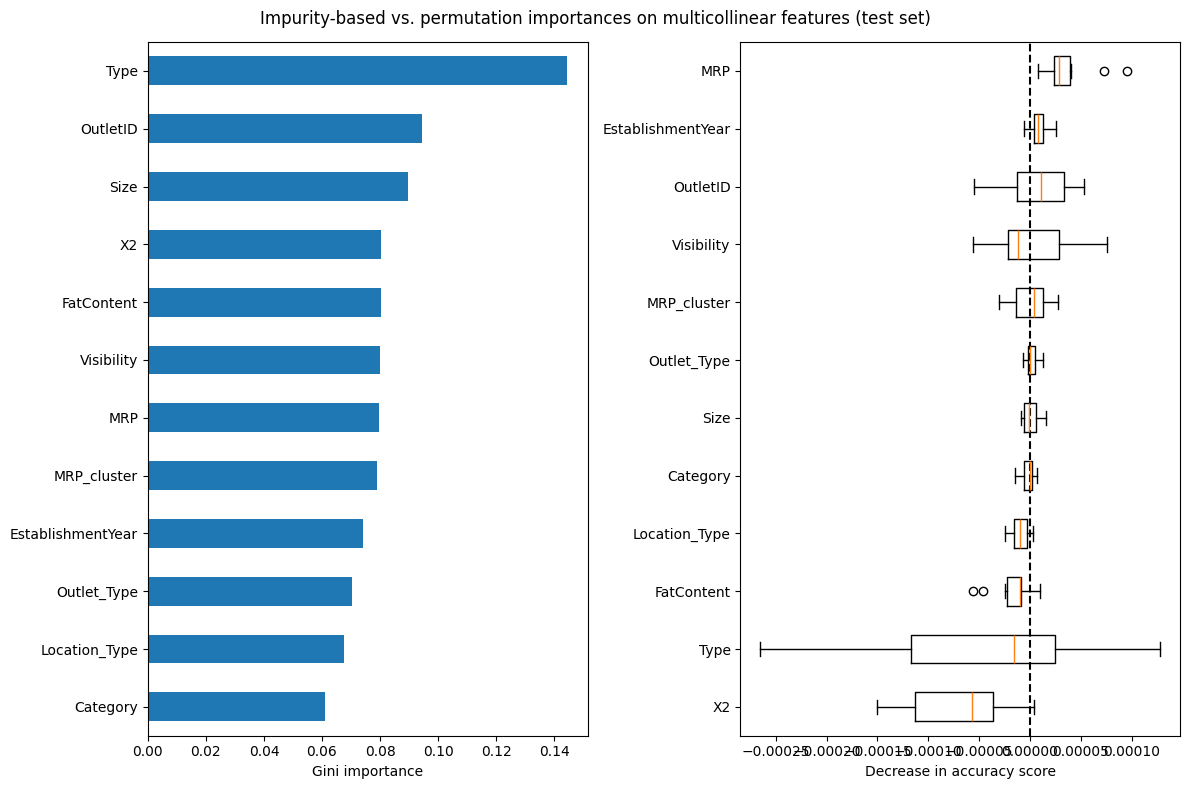

In [367]:
# Convert X_test to DataFrame
residual_model.fit(X_residual_train, residuals_train)
X_transformed_test_df = pd.DataFrame(X_residual_test, columns=X_residual_train.columns)

# Calculate feature importances
mdi_importances_test = pd.Series(residual_model.feature_importances_, index=X_residual_train.columns)
tree_importance_sorted_idx_test = np.argsort(residual_model.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance for test data
mdi_importances_test.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance for test data
plot_permutation_importance(residual_model, X_residual_test, residuals_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (test set)")
fig.tight_layout()
plt.show()

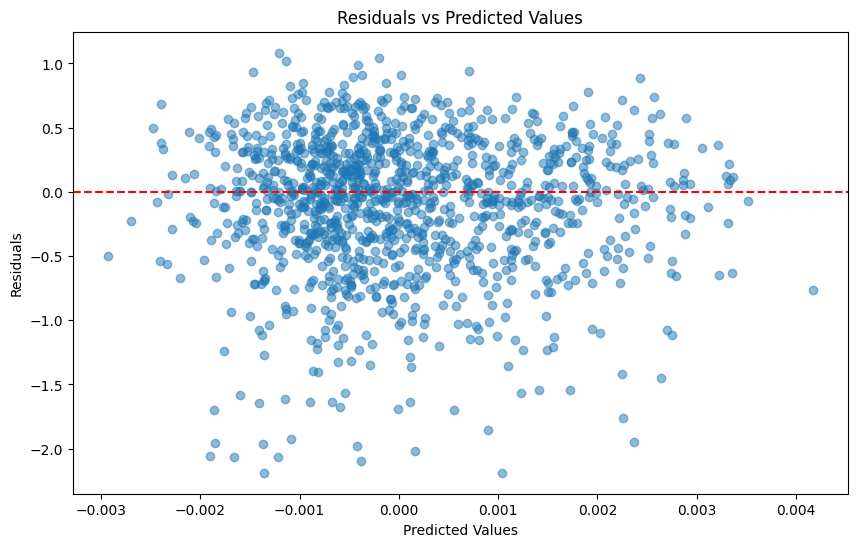

In [368]:
import matplotlib.pyplot as plt

# Predict the residuals
Y_residual_hat = residual_model.predict(X_residual_test)
Y_residual_hat = pd.DataFrame(Y_residual_hat, index=X_residual_test.index, columns=['Y'])
residual_of_residuals = residuals_test - Y_residual_hat
residual_of_residuals.head()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(Y_residual_hat, residual_of_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

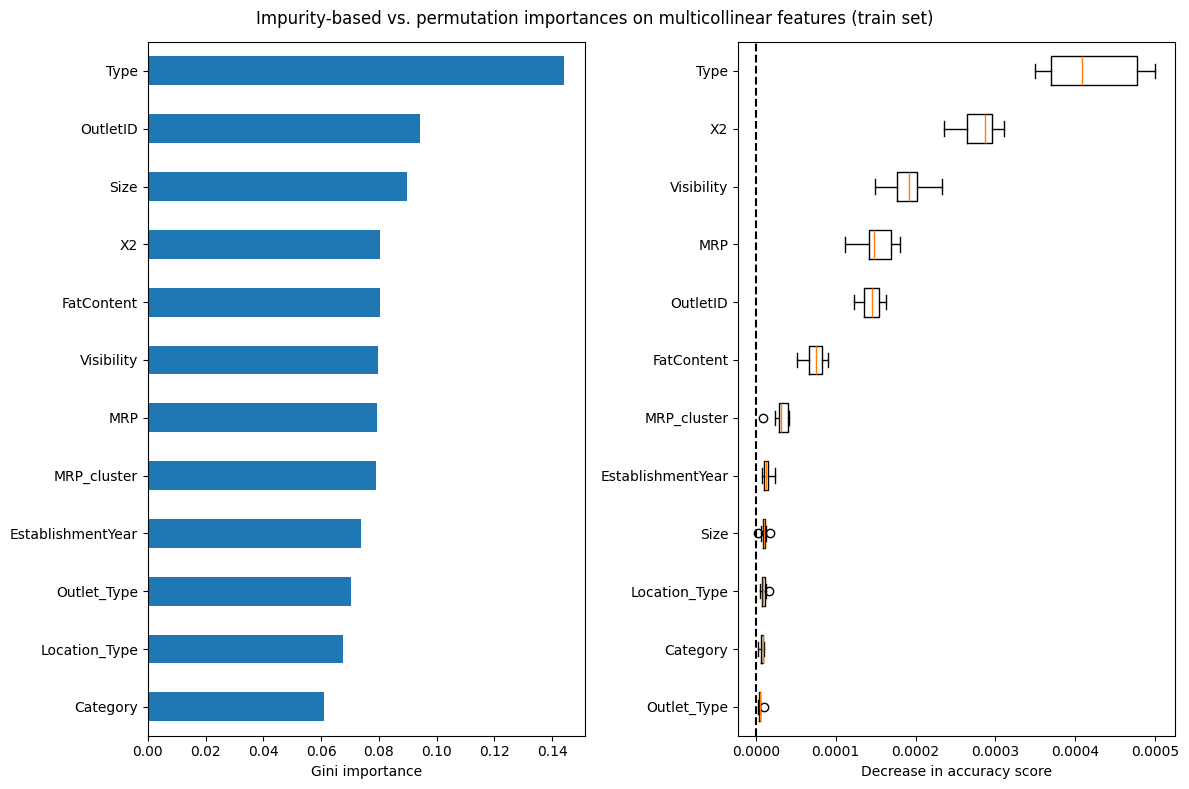

In [369]:
# Convert X_residual_train to DataFrame
X_transformed_train_df = pd.DataFrame(X_residual_train, columns=X_residual_train.columns)

# Calculate feature importances
mdi_importances_train = pd.Series(residual_model.feature_importances_, index=X_residual_train.columns)
tree_importance_sorted_idx_train = np.argsort(residual_model.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance for train data
mdi_importances_train.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance for train data
plot_permutation_importance(residual_model, X_residual_train, residuals_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (train set)")
fig.tight_layout()
plt.show()

In [370]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# Step 4: Prepare data for the meta-model
# Combine the primary and residual predictions as features
#primary_predictions_test = best_xgb_model.predict(X_test)
residual_predictions_test = residual_model.predict(X_residual_test)

# Train set for meta-model
meta_X_train = np.column_stack((primary_predictions_train, residual_model.predict(X_residual_train)))
meta_y_train = Y_train

# Test set for meta-model
meta_X_test = np.column_stack((primary_predictions_test, residual_predictions_test))

# Step 5: Train meta-model
# Create a polynomial regression model
degree = 2  # You can change the degree as needed
meta_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
meta_model.fit(meta_X_train, meta_y_train)

# Step 6: Make predictions using the meta-model
final_predictions_meta = meta_model.predict(meta_X_test)
final_additin = primary_predictions_test + residual_predictions_test
# Evaluate the meta-model
mae_meta = mean_absolute_error(Y_test, final_predictions_meta)
print(f"Mean Absolute Error (MAE) with Meta-Model: {mae_meta:.6f}")
addition_mae = mean_absolute_error(Y_test, final_additin)
print(f"Mean Absolute Error (MAE) with Addition: {addition_mae:.6f}")
raw_mae = mean_absolute_error(Y_test, best_xgb_model.predict(X_test))
print(f"Mean Absolute Error (MAE) with Raw: {raw_mae:.6f}")

# Get all numbers after the fraction



Mean Absolute Error (MAE) with Meta-Model: 0.420388
Mean Absolute Error (MAE) with Addition: 0.411292
Mean Absolute Error (MAE) with Raw: 0.411273
